<h1>
◓ POKÉMON CLUSTERING ◓
</h1>

<img src="https://64.media.tumblr.com/7e06425b06b19538ab684e7af0428fb0/e5f806d2bee2e996-78/s500x750/154f7b6faef4fb1e4db1640b6708e27c89b827cb.gifv" alt="dropout" border="0" width = "default">

por: <b>Erik Daskalyuk - 120062 & Ricardo Pereira - 120052</b>

<h2>Índice</h2>
<ul>
    <li>Capítulo I</li>
        <ul>
            <li>Introdução</li>
        </ul>
    <li>Capítulo II</li>
        <ul>
            <li>Data Wrangling</li>
        </ul>
    <li>Capítulo III</li>
        <ul>
            <li>Clustering</li>
        </ul>
    <li>Capítulo IV</li>
        <ul>
            <li>Conclusão</li>
        </ul>
</ul>

<h2>Capítulo I</h2>

<h3>Introdução</h3>

Pokémon, é um universo, num video jogo, criado pela <i>Game Freak</i> no qual o jogador atravessa diversas regiões, cada uma com a sua cultura, música e história. Neste mundo onde os habitantes são apenas humanos e Pokémons, o jogador é envolvido numa jornada para se tornar o mais forte dos treinadores de Pokémons criando laços com os seus companheiros nesta aventura.<br/>

Apesar do jogo ser direcionado para uma audiência mais jovem, os adultos não ficam de fora deste universo. O seu estilo de jogo inovador, música característica, sistema de combate estratégico combinado com a sensação de sucesso ao vencer os oponentes fez com que para muitos seja considerado nostálgico, principalmente nas gerações mais antigas.</br>

O sistema de combate é realizado por uma equipa de 6 Pokémons pertencentes à equipa dos treinadores.</br>
</br>
Cada Pokémon pode ter um ou dois tipos sendo estes:</br>
</br>
<img src="https://staticg.sportskeeda.com/editor/2023/10/0ee98-16968094488751-1920.jpg?w=840" alt="dropout" border="0" width = "600"></br>
</br>Cada tipo tem "strengths" e "weaknesses". No seguinte gráfico é demonstrado como o tipo influência o dano realizado ao oponente consoante o tipo de habilidade escolhida (o dano é multiplicado pelo valor registado na tabela).  </br>

<img src="https://img.pokemondb.net/images/typechart.png" alt="dropout" border="0" width = "600"></br>

<h2 id="capitulo2">Capítulo II</h2>

<h3>Data Wrangling</h3>

In [1]:
# Avoid Windows MKL warning
import warnings
warnings.filterwarnings('ignore')

Na célula seguinte realizamos os imports necessários para efetuarmos o estudo em questão.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

De seguida importamos o dataset.

In [3]:
df = pd.read_csv("Pokemon.csv")
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


Ao realizar um estudo de aprendizagem automática não supervisionada, é importante considerar quais as características dos dados são relevantes para o modelo. No caso específico do estudo de Pokémon, o ID do Pokémon e o nome do Pokémon não fornecem informações úteis para o estudo.

O ID do Pokémon é um identificador único atribuído a cada Pokémon e não possui relação direta com as suas características ou atributos. Portanto, não contribui para a análise e agrupamento dos Pokémons com base nas suas características.

Da mesma forma, o nome do Pokémon é uma informação descritiva que não possui um padrão específico ou relação com as suas características. Embora o nome do Pokémon seja importante para os jogadores e para a identificação dos Pokémon, não é relevante para a análise de aprendizagem automática não supervisionada.

Ao remover o ID do Pokémon e o nome do Pokémon do conjunto de dados, podemos concentrar-nos nas características e atributos dos Pokémon que são mais relevantes para o estudo. Isso permite que o modelo de atifique padrões e agrupe os Pokémons com base nas suas características sem ser influenciado por informações irrelevantes.


In [4]:
df.drop(["#", "Name"], axis=1, inplace=True)

A partir de um describe, conseguimos entender o comportamento dos nossos dados. Este dataset contêm um total de 800 Pokemons. Respetivamente aos stats dos Pokémons, vemos que têm no minimo 1 de HP e no máximo 255, com uma média de 69.26. Verificamos que o mínimo de Attack e Defense que o Pokémon pode ter é 5 e no máximo tem 190 de Attack e 230 de Defense. A média do Attack dos Pokémons é superior à Defense, com valores de 79.00 para Attack e 73.84 para Defense. Relativamente ao Special Attack e Special Defense, o minimo de Special Defense é o dobro do Special Attack, sendo valores de 10 para Special Attack e 20 para a Special Defense. Para os máximos, tem-se valores de 194 para o Special Attack e 230 para a Special Defense. As médias de ambos estão relativamente próximas, sendo de 72.82 para Special Attack e 71.9 para a Special Defense.
Os Pokémons no minimo podem tem 5 de Speed e no máximo 180, apresentando uma média de 68.28. Este estudo engloba 6 gerações de Pokémons.


In [5]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


Na célula seguinte verificamos a quantidade de nulls que existem no dataset. O facto de haver 386 casos com Type 2 igual a null, significa que quase metade dos Pokémons não têm um segundo tipo.

In [6]:
df.isnull().sum()

Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

Alguns Pokémons podem não ter tipo secundário, sendo desta forma apresentados como null. Isto não invalida a qualidade dos dados, dado que é uma característica própria do jogo haver Pokémons com apenas um tipo. Desta forma decidimos preencher estas instâncias com valor "No Type".

In [7]:
df.fillna("No Type",inplace=True)
df.isnull().sum()

Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

<h3>EDA</h3>

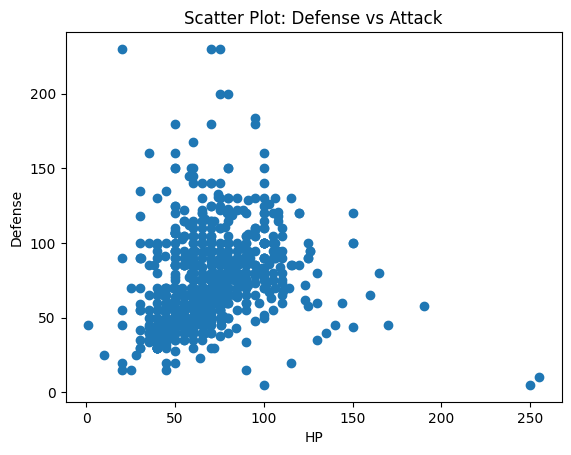

In [8]:
import matplotlib.pyplot as plt

plt.scatter(df['HP'], df['Defense'])
plt.xlabel('HP')
plt.ylabel('Defense')
plt.title('Scatter Plot: Defense vs Attack')
plt.show()

Através deste bar plot conseguimos ver a distribuição dos Pokémons. Neste dataset verifica-se uma menor quantidade de Pokémons lendários que os não lendários.

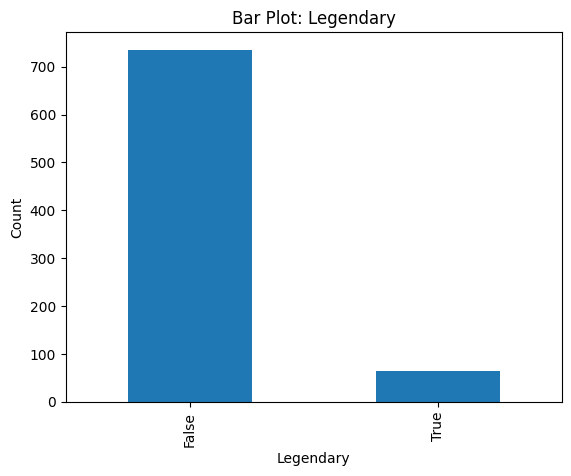

In [9]:
df['Legendary'].value_counts().plot(kind='bar')
plt.xlabel('Legendary')
plt.ylabel('Count')
plt.title('Bar Plot: Legendary')
plt.show()

A partir dos seguintes barplots, podemos aferir que existe uma maior quantidade de Pokémons com o tipo principal àgua. Já no tipo secundário, existe uma grande predominância de Pokémons sem tipo secundário.

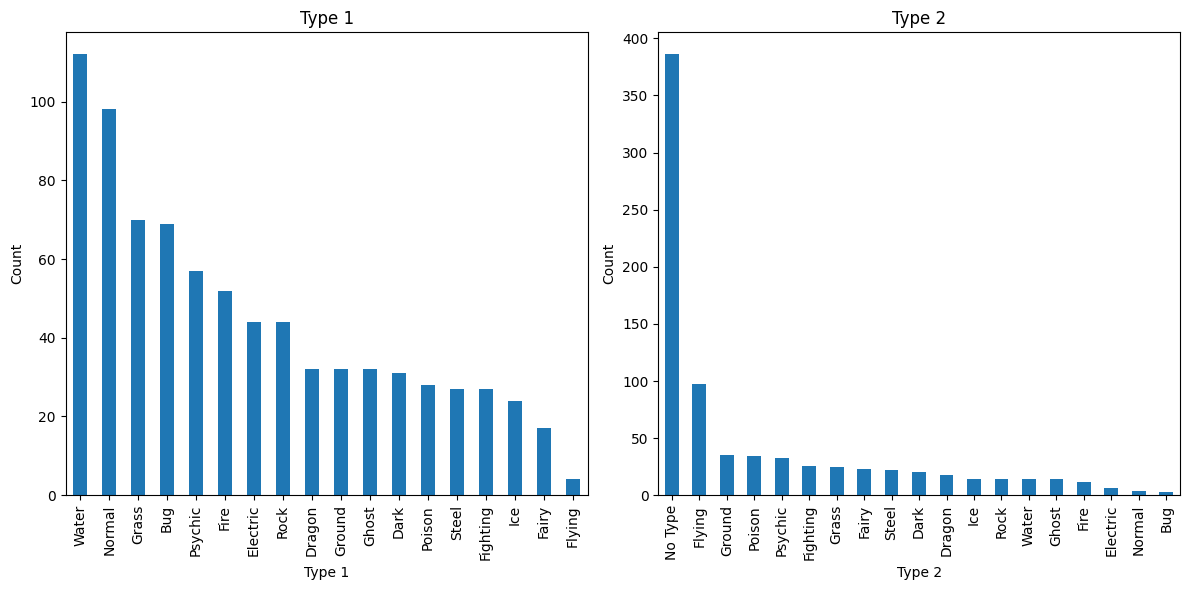

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

df['Type 1'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_xlabel('Type 1')
axes[0].set_ylabel('Count')
axes[0].set_title('Type 1')

df['Type 2'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_xlabel('Type 2')
axes[1].set_ylabel('Count')
axes[1].set_title('Type 2')

plt.tight_layout()
plt.show()

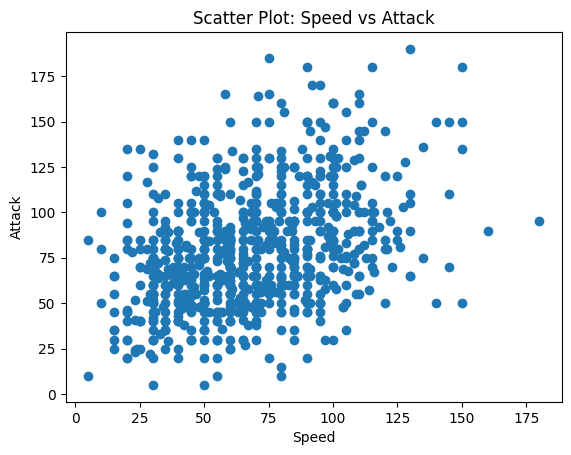

In [11]:
import matplotlib.pyplot as plt

plt.scatter(df['Speed'], df['Attack'])
plt.xlabel('Speed')
plt.ylabel('Attack')
plt.title('Scatter Plot: Speed vs Attack')
plt.show()

Por sua vez, realizamos um label encoder, para os respetivos tipos dos Pokémons e se os mesmos são lendários ou não, dado que estes modelos não trabalham com texto.

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Type 1"] = le.fit_transform(df["Type 1"])
df["Type 2"] = le.fit_transform(df["Type 2"])
df["Legendary"] = le.fit_transform(df["Legendary"])

Ao analisarmos este heatmap, ressalta a forte correlação entre o Total do Pokemon e o HP (0.62 de correlação),o ataque e o total (0.74 de correlação), a defesa e o total (0.61 de correlação), total e o ataque especial (0.75 de correlação), a defesa especial e o total (0.72 de correlação), o speed e o total (0.58 de correlação) e o total e o legendary (0.5 de correlação). Este tipo de comportamento, já era expectado, uma vez que estas variáveis correspondem aos status de um Pokemon que por sua vez influencia o seu total. A partir deste valores, pode-se afirmar que o ataque especial e o ataque normal tem uma grande influência no total do Pokemon.

<Axes: >

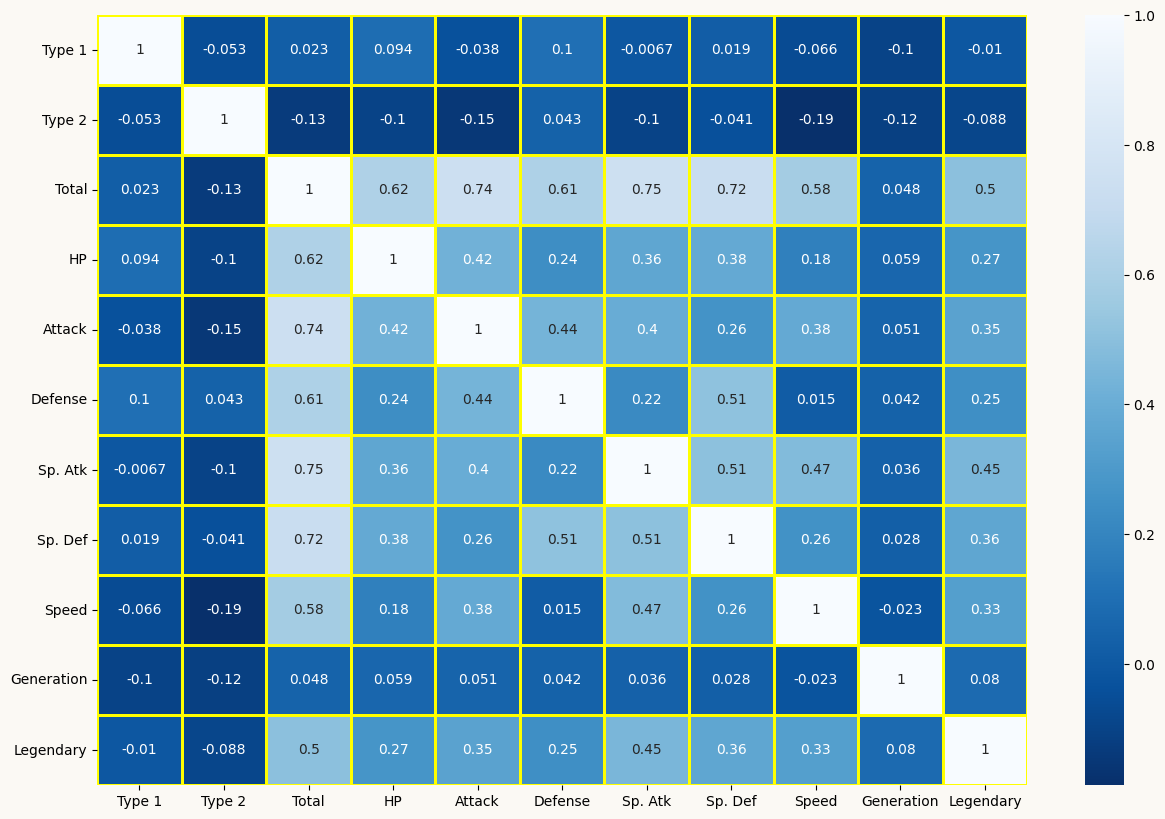

In [13]:
fig = plt.figure(figsize=(15,10))
fig.patch.set_facecolor("#fbf9f4")
fig.set_facecolor("#fbf9f4")
sns.color_palette("mako", as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap="Blues_r", linewidths=2, linecolor='yellow')

<h2 id="capitulo3">Capítulo III</h2>

<h3>Cluster Analysis without Feature Reduction</h3>

Vamos agora importar as bibliotecas necessárias para fazer o estudo em clustering

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

Inicialmente iremos analisar quão bons são os nossos dados para fazer clustering sem redução de dimensionalidade e posteriormente comparar esta análise com as diferentes técnicas de <i>feature reduction</i>.

Devido à multidimensionalidade do dataframe, escolhemos duas features como base para clustering do nosso modelo, de forma a facilitar a visualização dos clusters, sendo estas o Total e o Special Attack.

In [15]:
X = df[['Total','Sp. Atk']].copy()

O seguinte gráfico demonstra a relação entre o Total e o Special Attack.</br>
Como se pode ver, não existe grande capacidade de criação de bons clusters, que neste caso se classificam como bons pelo facto de estarem bem isolados e agrupados, mais em frente veremos como se comportam.

Text(0, 0.5, 'Sp. Atk')

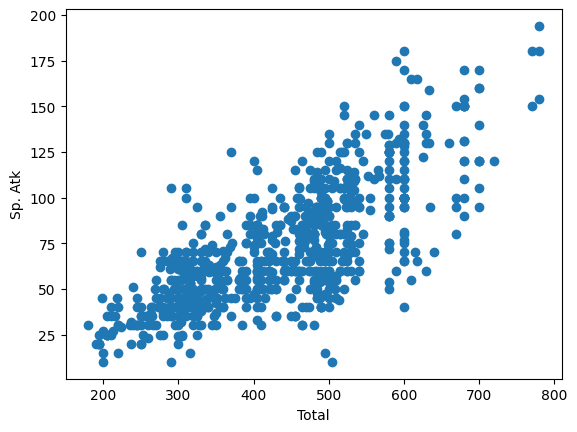

In [16]:
plt.scatter(X['Total'],X['Sp. Atk'])
plt.xlabel('Total')
plt.ylabel('Sp. Atk')

O método <i>Elbow</i> é uma abordagem gráfica que auxilia na determinação do valor ótimo de k ( k = número de clusters ) para o algoritmo de clustering K-means. Atráves da análise do gráfico criado, é possível identificar o ponto de "cotovelo", que indica uma diminuição na taxa de variação da inércia ( soma das distâncias quadradas das amostras ao centro do cluster ) em relação ao aumento do k. No gráfico reproduzido, concluímos que o número ótimo para o k é 3. 

No método Silhouette, cada dado é atribuído a um cluster e é calculada uma medida que avalia o quão bem se encaixa dentro do seu cluster em comparação com outros clusters próximos. Os valores do Silhouette variam de -1 a 1 e quanto mais próximos de 1 significa que as amostras estão muito bem ajustadas ao seu cluster. Então, o número ideal de clusters é escolhido quando a pontuação média do Silhouette é maximizada. No entanto, ao contrário do método <em>Elbow</em> o número ótimo de clusters, segundo o método Silhouett são 2.

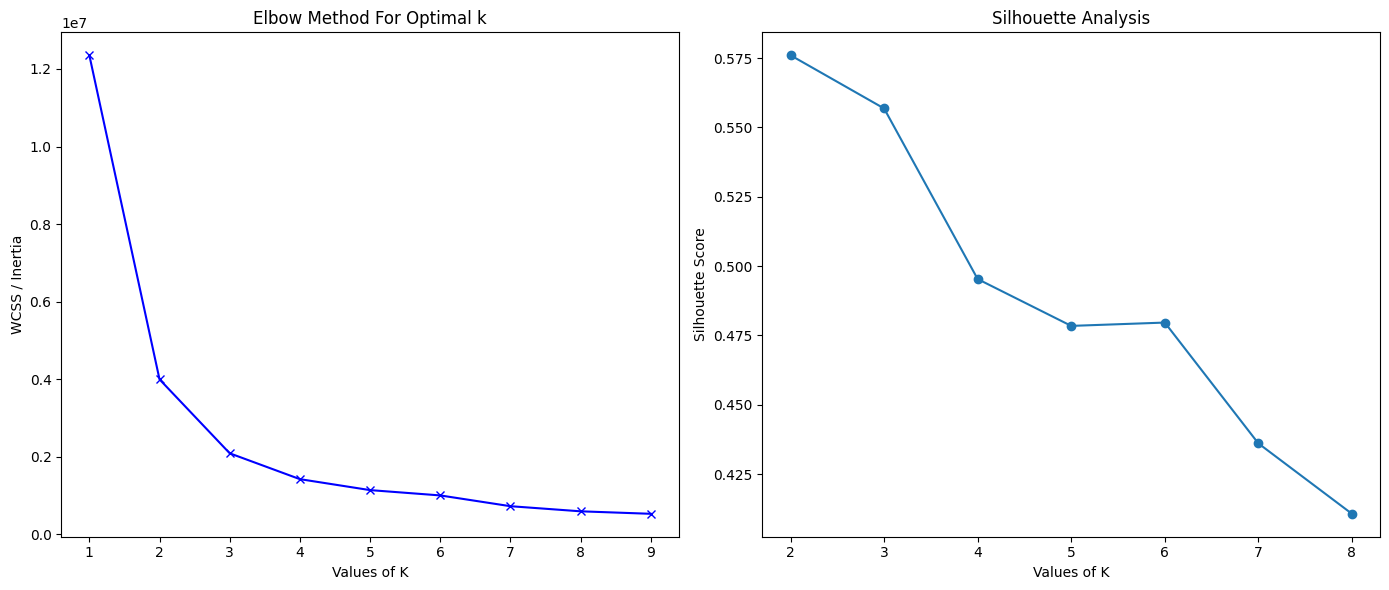

In [17]:
SSE = []
K = range(1, 10)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

SC = []
K = range(2, 9)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=5)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    SC.append(silhouette_score(X, cluster_labels))

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(range(1, 10), SSE, "bx-")
axes[0].set_xlabel("Values of K")
axes[0].set_ylabel("WCSS / Inertia")
axes[0].set_title("Elbow Method For Optimal k")

axes[1].plot(range(2, 9), SC, marker='o')
axes[1].set_xlabel("Values of K")
axes[1].set_ylabel("Silhouette Score")
axes[1].set_title("Silhouette Analysis")

plt.tight_layout()
plt.show()

Vamos agora criar os clusters de acordo com o gráfico mostrado anteriormente entre Total e Special Attack.

In [18]:
kmeans = KMeans(n_clusters=2, random_state=5, n_init='auto')
kmeans_model = kmeans.fit(X)
y_kmeans = kmeans_model.predict(X)

Neste gráfico podemos ver que os dados foram divididos em 2 clusters, uma vez que foi o número de clusters ótimo na análise do método Silhouette. Como se pode averiguar, não existem clusters bem definidos e isolados como se pretende. Mais à frente iremos comparar estes clusters com diferentes métodos de redução de dimensionalidade.

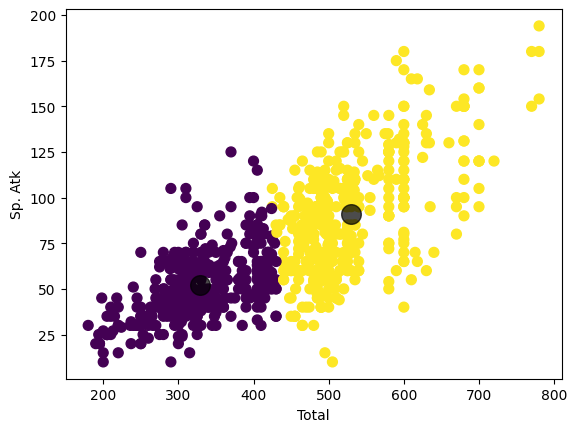

In [19]:
plt.scatter(X['Total'], X['Sp. Atk'], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans_model.cluster_centers_
plt.ylabel('Sp. Atk')
plt.xlabel('Total')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.7)

<h3>PCA</h3>

In [20]:
from sklearn.decomposition import PCA

In [21]:
df_PCA = df.copy()

Ná célula seguinte efetuamos a normalização dos dados.

In [22]:
# Normalize
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,0.529412,0.777778,0.230000,0.173228,0.237838,0.195556,0.298913,0.214286,0.228571,0.0,0.0
1,0.529412,0.777778,0.375000,0.232283,0.308108,0.257778,0.380435,0.285714,0.314286,0.0,0.0
2,0.529412,0.777778,0.575000,0.311024,0.416216,0.346667,0.489130,0.380952,0.428571,0.0,0.0
3,0.529412,0.777778,0.741667,0.311024,0.513514,0.524444,0.608696,0.476190,0.428571,0.0,0.0
4,0.352941,0.666667,0.215000,0.149606,0.254054,0.168889,0.271739,0.142857,0.342857,0.0,0.0


Na célula seguinte é realizado um PCA no dataframe ao qual foi realizada a normalização de dados.

In [67]:
pca = PCA(n_components=2)
df_PCA = pca.fit_transform(df_scaled)
df_PCA = pd.DataFrame(df_PCA, columns=['PC1', 'PC2'])
df_PCA.head()

,PC1,PC2
0,-0.437122,-0.197434
1,-0.267095,-0.255842
2,-0.031900,-0.336454
3,0.165247,-0.406845
4,-0.413047,-0.069915


A variância é uma medida de dispersão dos dados em relação à média. Quanto maior a variância, mais espalhados estão os dados.
Com o seguinte barplot, pode-se dizer que o componente principal 1 (PC1) explica 27% dos dados, enquanto o componente principal 2 (PC2) explica 24% dos dados.
Portanto, a relação de variância de 27 para 24 do PC1 para o PC2 diz-nos que o PC1 é mais importante para explicar a estrutura dos dados do que o PC2.

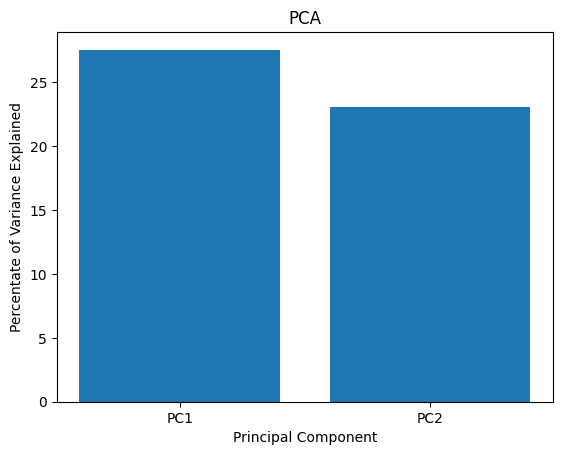

In [68]:
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2']
plt.bar(x=range(1,3), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.title('PCA')
plt.show()

No seguinte gráfico podemos ver dois agrupamentos de dados isolados. Comparativamente com a análise realizada sem utilização de <i>feature reduction</i> são notáveis as diferenças entre os dois gráficos, neste os dados estão mais agrupados criando dois agrupamentos de dados, enquanto que no anterior os dados estavam muito misturados. Apesar deste notável melhoramento exise ainda alguma discrepancia entre os dados.

In [24]:
fig = px.scatter(df_PCA, x=df_PCA['PC1'], y=df_PCA["PC2"], width=800, height=600)
fig.update_layout(
    title="PCA visualization",
    xaxis_title="PCA1",
    yaxis_title="PCA2",
)
fig.show()

Neste caso, tanto o método de <em>Elbow</em> quanto o coeficiente de Silhouette indicam que o número ótimo de clusters é 3.

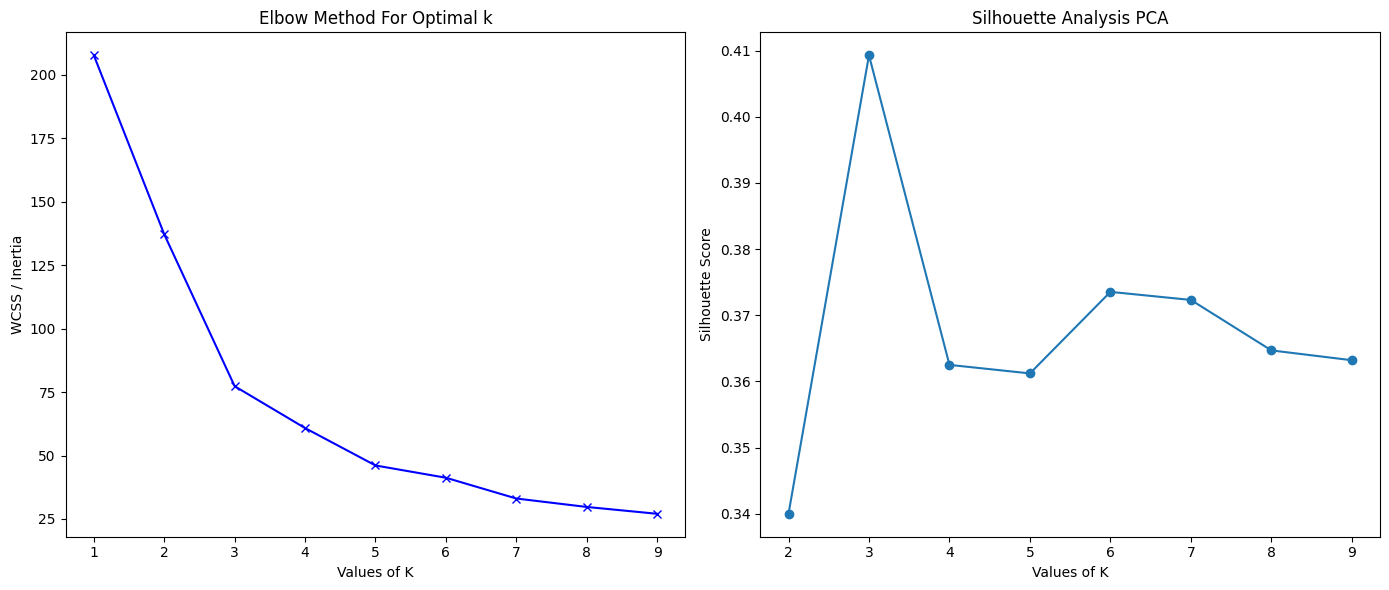

In [25]:

SSE = []
K = range(1, 10)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
    kmeans.fit(df_PCA)
    SSE.append(kmeans.inertia_)

SC = []
K = range(2, 10)
for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=1)
    kmeans.fit(df_PCA)
    cluster_labels = kmeans.labels_
    SC.append(silhouette_score(df_PCA, cluster_labels))


fig, axes = plt.subplots(1, 2, figsize=(14, 6))


axes[0].plot(range(1, 10), SSE, "bx-")
axes[0].set_xlabel("Values of K")
axes[0].set_ylabel("WCSS / Inertia")
axes[0].set_title("Elbow Method For Optimal k")


axes[1].plot(range(2, 10), SC, marker='o')
axes[1].set_xlabel("Values of K")
axes[1].set_ylabel("Silhouette Score")
axes[1].set_title("Silhouette Analysis PCA")

plt.tight_layout()
plt.show()


In [26]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=5)
model = kmeans.fit(df_PCA)

df_PCA['cluster'] = model.labels_.astype(str)

# Get the centroids
centers = model.cluster_centers_

# Plot using Plotly Express
fig = px.scatter(df_PCA, x=df_PCA['PC1'], y=df_PCA['PC2'], color='cluster', symbol='cluster',
                 title=f'KMeans Clustering with {num_clusters} Clusters - With PCA',
                 color_continuous_scale=px.colors.qualitative.Vivid, width=800, height=600)

# Add centroids as scatter points
centroid_fig = fig.add_scatter(x=centers[:, 0], y=centers[:, 1], mode='markers',
                               marker=dict(size=10, color='black', symbol='circle', line=dict(width=1)), name = 'Centroids', opacity = 0.7)

# Show the plot with centroids
centroid_fig.show()

In [27]:
df_total_PCA = pd.concat([df_PCA, df], axis=1)
df_total_PCA.head()

,PC1,PC2,cluster,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,-0.437122,-0.197434,0,9,14,318,45,49,49,65,65,45,1,0
1,-0.267095,-0.255842,0,9,14,405,60,62,63,80,80,60,1,0
2,-0.031900,-0.336454,0,9,14,525,80,82,83,100,100,80,1,0
3,0.165247,-0.406845,0,9,14,625,80,100,123,122,120,80,1,0
4,-0.413047,-0.069915,0,6,12,309,39,52,43,60,50,65,1,0


In [28]:
df_total_PCA.describe()

,PC1,PC2,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,8.000000e+02,8.000000e+02,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000
mean,2.664535e-17,5.329071e-17,9.467500,10.491250,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125
std,3.760456e-01,3.443436e-01,5.580356,3.750334,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339
min,-7.185489e-01,-8.674549e-01,0.000000,0.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000
25%,-2.352369e-01,-2.679039e-01,5.000000,7.000000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000
50%,-6.537475e-02,3.643141e-03,10.000000,12.000000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000
75%,1.647027e-01,2.451561e-01,14.000000,12.000000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000
max,1.314439e+00,9.107778e-01,17.000000,18.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000


In [29]:
# Non Legendaries

cluster0_filter_PCA = df_total_PCA['cluster'] == '0'
df_cluster0_pca = df_total_PCA[cluster0_filter_PCA]
df_cluster0_pca.describe()

,PC1,PC2,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.0
mean,-0.186736,-0.260160,12.810734,10.935028,412.500000,67.697740,72.491525,71.316384,67.663842,68.443503,64.887006,2.175141,0.0
std,0.213936,0.192477,3.950228,3.640154,102.669255,28.325539,28.084175,31.968228,27.296971,24.822964,26.384254,1.215039,0.0
min,-0.718549,-0.741034,2.000000,0.000000,180.000000,10.000000,5.000000,5.000000,10.000000,20.000000,10.000000,1.000000,0.0
25%,-0.358440,-0.399429,10.000000,10.000000,323.500000,50.000000,50.000000,50.000000,47.250000,50.000000,45.000000,1.000000,0.0
50%,-0.182364,-0.250011,13.000000,12.000000,420.000000,65.000000,70.000000,65.000000,65.000000,65.000000,64.000000,2.000000,0.0
75%,-0.032875,-0.105563,17.000000,12.000000,493.750000,80.000000,90.000000,85.000000,85.000000,85.000000,83.750000,3.000000,0.0
max,0.319002,0.135515,17.000000,18.000000,640.000000,255.000000,165.000000,230.000000,175.000000,150.000000,150.000000,5.000000,0.0


In [30]:
# Non Legendaries

cluster1_filter_PCA = df_total_PCA['cluster'] == '1'
df_cluster1_pca = df_total_PCA[cluster1_filter_PCA]
df_cluster1_pca.describe()

,PC1,PC2,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.000000,369.0
mean,-0.004576,0.291344,6.224932,10.390244,414.455285,65.956640,76.875339,70.853659,67.617886,68.474255,64.677507,4.338753,0.0
std,0.231930,0.210126,5.009320,3.683027,104.308587,20.587783,30.657836,28.453055,29.554166,26.208093,28.540619,1.356001,0.0
min,-0.643778,-0.100570,0.000000,1.000000,194.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.0
25%,-0.173071,0.125087,1.000000,7.000000,319.000000,50.000000,55.000000,50.000000,45.000000,50.000000,43.000000,3.000000,0.0
50%,0.011226,0.254863,6.000000,12.000000,424.000000,65.000000,73.000000,67.000000,60.000000,65.000000,60.000000,5.000000,0.0
75%,0.178785,0.461267,10.000000,12.000000,499.000000,75.000000,95.000000,85.000000,85.000000,82.000000,85.000000,5.000000,0.0
max,0.513715,0.910778,17.000000,18.000000,625.000000,150.000000,185.000000,230.000000,165.000000,230.000000,160.000000,6.000000,0.0


In [31]:
# Legendaries

cluster2_filter_PCA = df_total_PCA['cluster'] == '2'
df_cluster2_pca = df_total_PCA[cluster2_filter_PCA]
df_cluster2_pca.describe()

,PC1,PC2,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.880431,-0.200120,9.636364,8.935065,637.961039,92.259740,119.116883,99.779221,121.454545,104.233766,101.116883,3.740260,0.844156
std,0.256395,0.304540,5.500979,4.149628,59.247128,21.805602,31.798284,28.312924,30.249639,27.967508,22.177498,1.389837,0.365086
min,0.356869,-0.867455,1.000000,1.000000,567.000000,50.000000,50.000000,20.000000,50.000000,20.000000,50.000000,1.000000,0.000000
25%,0.730274,-0.427695,3.000000,6.000000,580.000000,80.000000,100.000000,85.000000,100.000000,90.000000,90.000000,3.000000,1.000000
50%,0.933520,-0.181754,10.000000,10.000000,600.000000,91.000000,115.000000,95.000000,120.000000,100.000000,100.000000,4.000000,1.000000
75%,1.077810,-0.012304,14.000000,12.000000,680.000000,105.000000,145.000000,115.000000,145.000000,120.000000,110.000000,5.000000,1.000000
max,1.314439,0.424230,17.000000,18.000000,780.000000,150.000000,190.000000,200.000000,194.000000,200.000000,180.000000,6.000000,1.000000


<h3>TSNE</h3>

In [32]:
from sklearn.manifold import TSNE

In [33]:
tsne = TSNE(n_components=2, perplexity=30, random_state=1, n_jobs=-1)
df_tsne = tsne.fit_transform(df_scaled)

df_tsne = pd.DataFrame(df_tsne, columns=['Embedding 1', 'Embedding 2'])

fig = px.scatter(df_tsne, x=df_tsne['Embedding 1'], y=df_tsne["Embedding 2"], width=800, height=600)
fig.update_layout(
    title="T-SNE",
    xaxis_title="Embedding 1",
    yaxis_title="Embedding 2",
)
fig.show()

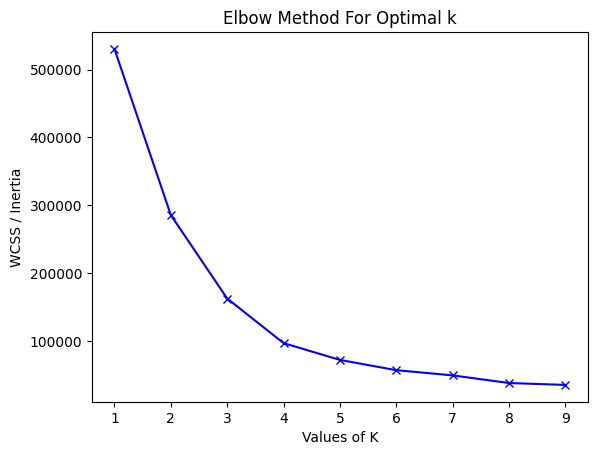

In [34]:
SSE = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto')
    kmeans.fit(df_tsne)
    SSE.append(kmeans.inertia_)
plt.plot(K, SSE, "bx-")
plt.xlabel("Values of K") 
plt.ylabel("WCSS / Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

In [35]:
SC = []
K = range(2,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=5)
    kmeans.fit(df_tsne)
    cluster_labels = kmeans.labels_
    SC.append(silhouette_score(df_tsne, cluster_labels))

fig = px.line(df_tsne, x=K, y=SC, width=800, height=600)
fig.update_layout(
    title="Silhouete Analysis TSNE",
    xaxis_title="Values of K",
    yaxis_title="Silhouete score",
)
fig.show()

In [36]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=5)
model = kmeans.fit(df_tsne)

df_tsne['cluster'] = model.labels_.astype(str)

# Get the centroids
centers = model.cluster_centers_

# Plot using Plotly Express
fig = px.scatter(df_tsne, x=df_tsne['Embedding 1'], y=df_tsne['Embedding 2'], color='cluster', symbol='cluster',
                 title=f'KMeans Clustering with {num_clusters} Clusters - With TSNE',
                 color_continuous_scale=px.colors.qualitative.Vivid, width=800, height=600)

# Add centroids as scatter points
centroid_fig = fig.add_scatter(x=centers[:, 0], y=centers[:, 1], mode='markers',
                               marker=dict(size=10, color='black', symbol='circle', line=dict(width=1)), name = 'Centroids', opacity = 0.7)

# Show the plot with centroids
centroid_fig.show()

In [37]:
df_total_tsne = pd.concat([df_tsne, df], axis=1)
df_total_tsne.head()

,Embedding 1,Embedding 2,cluster,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,-20.993410,-7.087791,0,9,14,318,45,49,49,65,65,45,1,0
1,-20.431183,-5.245334,0,9,14,405,60,62,63,80,80,60,1,0
2,-20.433382,-0.151807,0,9,14,525,80,82,83,100,100,80,1,0
3,-20.484581,0.731961,0,9,14,625,80,100,123,122,120,80,1,0
4,-24.014730,12.388343,0,6,12,309,39,52,43,60,50,65,1,0


In [38]:
# Non Legendaries

cluster0_filter_tsne = df_total_tsne['cluster'] == '0'
df_cluster0_tsne = df_total_tsne[cluster0_filter_tsne]
df_cluster0_tsne.describe()

,Embedding 1,Embedding 2,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.0
mean,-3.896672,1.009887,9.484354,10.589116,417.213605,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782,3.284354,0.0
std,12.661709,15.099704,5.593833,3.710930,106.760417,24.808849,30.490153,30.408194,29.091705,25.669310,27.843038,1.673471,0.0
min,-28.320080,-27.426716,0.000000,0.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.0
25%,-14.074966,-11.697544,5.000000,8.000000,324.000000,50.000000,54.500000,50.000000,45.000000,50.000000,45.000000,2.000000,0.0
50%,-3.766655,0.304005,10.000000,12.000000,425.000000,65.000000,72.000000,66.000000,65.000000,65.000000,64.000000,3.000000,0.0
75%,5.870460,13.226578,14.000000,12.000000,498.000000,79.500000,95.000000,85.000000,85.000000,85.000000,85.000000,5.000000,0.0
max,21.436966,31.988325,17.000000,18.000000,700.000000,255.000000,185.000000,230.000000,175.000000,230.000000,160.000000,6.000000,0.0


In [39]:
# Legendaries

cluster1_filter_tsne = df_total_tsne['cluster'] == '1'
df_cluster1_tsne = df_total_tsne[cluster1_filter_tsne]
df_cluster1_tsne.describe()

,Embedding 1,Embedding 2,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0
mean,59.834286,-4.562462,9.276923,9.384615,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,3.769231,1.0
std,2.367180,2.861128,5.464395,4.037683,60.937389,21.722164,30.348037,28.255131,31.104608,28.827004,22.952323,1.455262,0.0
min,55.122398,-9.999205,1.000000,1.000000,580.000000,50.000000,50.000000,20.000000,50.000000,20.000000,50.000000,1.000000,1.0
25%,58.048954,-6.804685,3.000000,7.000000,580.000000,80.000000,100.000000,90.000000,100.000000,90.000000,90.000000,3.000000,1.0
50%,59.760643,-4.663316,10.000000,11.000000,600.000000,91.000000,110.000000,100.000000,120.000000,100.000000,100.000000,4.000000,1.0
75%,61.660431,-2.139608,14.000000,12.000000,680.000000,105.000000,131.000000,115.000000,150.000000,120.000000,110.000000,5.000000,1.0
max,64.282043,0.681998,17.000000,18.000000,780.000000,150.000000,190.000000,200.000000,194.000000,200.000000,180.000000,6.000000,1.0


<h3>UMAP</h3>

In [40]:
import umap

In [41]:
df_umap = df_scaled.copy()

In [42]:
umap_dr = umap.UMAP(n_jobs=-1, n_neighbors=100, random_state=5)
df_umap = umap_dr.fit_transform(df_umap)

df_umap = pd.DataFrame(df_umap, columns=['Embedding 1', 'Embedding 2'])
df_umap.shape

(800, 2)

In [43]:
fig = px.scatter(df_umap, x=df_umap['Embedding 1'], y=df_umap['Embedding 2'], width=800, height=600)
fig.update_layout(
    title="UMAP visualization",
    xaxis_title="Embedding 1",
    yaxis_title="Embedding 2",
)
fig.show()

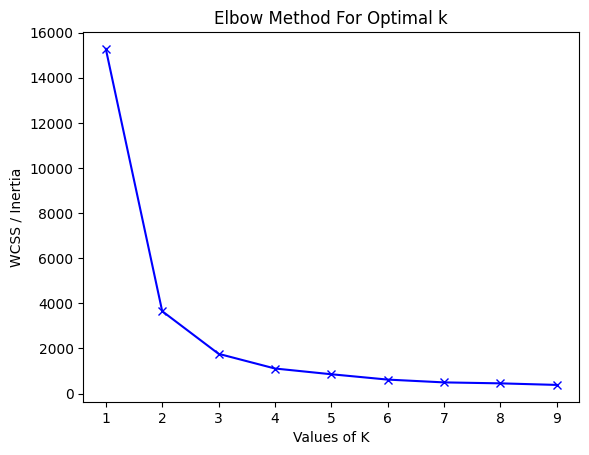

In [44]:
SSE = []
K = range(1,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=5)
    kmeans.fit(df_umap)
    SSE.append(kmeans.inertia_)
plt.plot(K, SSE, "bx-")
plt.xlabel("Values of K") 
plt.ylabel("WCSS / Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

In [45]:
SC = []
K = range(2,10)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=5)
    kmeans.fit(df_umap)
    cluster_labels = kmeans.labels_
    SC.append(silhouette_score(df_umap, cluster_labels))

fig = px.line(df_umap, x=K, y=SC, width=800, height=600)
fig.update_layout(
    title="Silhouete Analysis UMAP",
    xaxis_title="Values of K",
    yaxis_title="Silhouete score",
)
fig.show()

In [46]:
num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters, n_init='auto', random_state=5)
model = kmeans.fit(df_umap)

df_umap['cluster'] = model.labels_.astype(str)


# Get the centroids
centers = model.cluster_centers_

# Plot using Plotly Express
fig = px.scatter(df_umap, x=df_umap['Embedding 1'], y=df_umap['Embedding 2'], color='cluster', symbol='cluster',
                 title=f'KMeans Clustering with {num_clusters} Clusters - With UMAP',
                 color_continuous_scale=px.colors.qualitative.Vivid, width=800, height=600)

# Add centroids as scatter points
centroid_fig = fig.add_scatter(x=centers[:, 0], y=centers[:, 1], mode='markers',
                               marker=dict(size=10, color='black', symbol='circle', line=dict(width=1)), name = 'Centroids', opacity = 0.7)

# Show the plot with centroids
centroid_fig.show()

In [47]:
df_total_umap = pd.concat([df_umap, df], axis=1)
df_total_umap.head()

,Embedding 1,Embedding 2,cluster,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,15.343554,7.879487,0,9,14,318,45,49,49,65,65,45,1,0
1,14.813205,7.818859,0,9,14,405,60,62,63,80,80,60,1,0
2,14.353787,7.869158,0,9,14,525,80,82,83,100,100,80,1,0
3,14.358835,8.029392,0,9,14,625,80,100,123,122,120,80,1,0
4,13.619227,6.599185,0,6,12,309,39,52,43,60,50,65,1,0


In [48]:
# Non Legendaries

cluster0_filter_umap = df_total_umap['cluster'] == '0'
df_cluster0_umap = df_total_umap[cluster0_filter_umap]
df_cluster0_umap.describe()

,Embedding 1,Embedding 2,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.000000,735.0
mean,13.464738,9.305213,9.484354,10.589116,417.213605,67.182313,75.669388,71.559184,68.454422,68.892517,65.455782,3.284354,0.0
std,1.482703,1.664159,5.593833,3.710930,106.760417,24.808849,30.490153,30.408194,29.091705,25.669310,27.843038,1.673471,0.0
min,10.381479,6.015713,0.000000,0.000000,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,0.0
25%,12.385471,7.933611,5.000000,8.000000,324.000000,50.000000,54.500000,50.000000,45.000000,50.000000,45.000000,2.000000,0.0
50%,13.473115,9.369933,10.000000,12.000000,425.000000,65.000000,72.000000,66.000000,65.000000,65.000000,64.000000,3.000000,0.0
75%,14.595366,10.598544,14.000000,12.000000,498.000000,79.500000,95.000000,85.000000,85.000000,85.000000,85.000000,5.000000,0.0
max,16.413128,12.667866,17.000000,18.000000,700.000000,255.000000,185.000000,230.000000,175.000000,230.000000,160.000000,6.000000,0.0


In [49]:
cluster1_filter_umap = df_total_umap['cluster'] == '1'
df_cluster1_umap = df_total_umap[cluster1_filter_umap]
df_cluster1_umap.describe()

,Embedding 1,Embedding 2,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.0
mean,4.967972,-1.761541,9.276923,9.384615,637.384615,92.738462,116.676923,99.661538,122.184615,105.938462,100.184615,3.769231,1.0
std,0.270900,0.167111,5.464395,4.037683,60.937389,21.722164,30.348037,28.255131,31.104608,28.827004,22.952323,1.455262,0.0
min,4.547934,-2.012334,1.000000,1.000000,580.000000,50.000000,50.000000,20.000000,50.000000,20.000000,50.000000,1.000000,1.0
25%,4.736417,-1.900021,3.000000,7.000000,580.000000,80.000000,100.000000,90.000000,100.000000,90.000000,90.000000,3.000000,1.0
50%,4.901895,-1.791596,10.000000,11.000000,600.000000,91.000000,110.000000,100.000000,120.000000,100.000000,100.000000,4.000000,1.0
75%,5.203848,-1.673947,14.000000,12.000000,680.000000,105.000000,131.000000,115.000000,150.000000,120.000000,110.000000,5.000000,1.0
max,5.458888,-1.404880,17.000000,18.000000,780.000000,150.000000,190.000000,200.000000,194.000000,200.000000,180.000000,6.000000,1.0


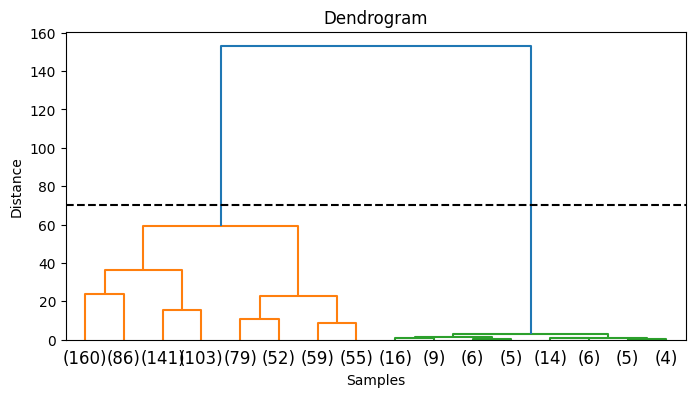

In [50]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
# Calculate linkage matrix
linked = linkage(df_umap, method='ward')

# Plot dendrogram
plt.figure(figsize=(8, 4))
dendrogram(linked, orientation='top', distance_sort='descending', truncate_mode='level', p=3 ,show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.axhline(y=70, color = 'black', linestyle = '--')
plt.show()

In [51]:
clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
clustering_model = clustering.fit_predict(df_umap)

In [52]:
X_new = pd.DataFrame(df_umap)
X_new['cluster'] = clustering_model.astype(str)
X_new.head()

,Embedding 1,Embedding 2,cluster
0,15.343554,7.879487,0
1,14.813205,7.818859,0
2,14.353787,7.869158,0
3,14.358835,8.029392,0
4,13.619227,6.599185,0


In [53]:
import plotly.express as px
fig = px.scatter(X_new, color="cluster", width=800, height=600)
fig.update_layout(
    title="Hierarchical Clustering"
)
fig.show()

<h2 id="capitulo4">Capítulo IV</h2>

<h3>Conclusão</h3>